# torch.autograd
> `torch.autograd`는 신경망 학습을 지원하는 Pytorch의 자동 미분 엔진입니다. 

## Forward Propagation(순전파)
> 신경망은 정답을 맞추기 위해 최선의 추측을 합니다. 이렇게 추측을 하기 위해서 입력 데이터를 각 함수들에서 실행합니다.

## Backward Propagation(역전파)
> 신경망은 추측한 값에서 발생한 오류에 비례하여 매개변수들을 적절히 조절합니다. 

# Tensors, Functions and Computational graph

In [1]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b # wx + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

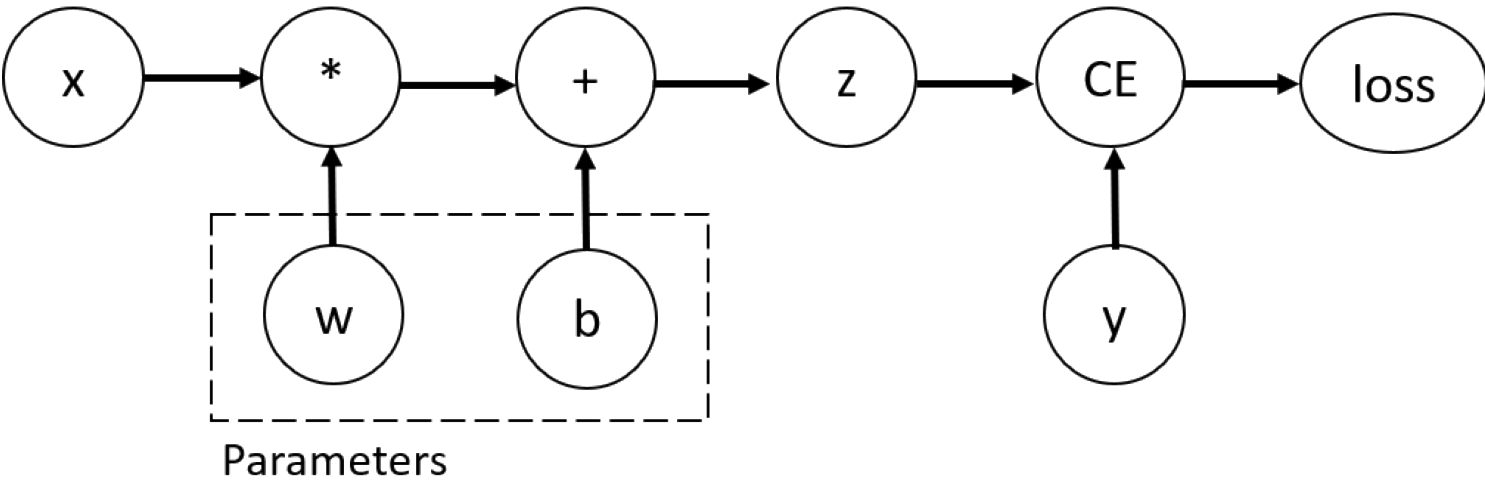

In [2]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7fa61859a9a0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fa61859ac40>


# Computing gradients

In [3]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0735, 0.3301, 0.3143],
        [0.0735, 0.3301, 0.3143],
        [0.0735, 0.3301, 0.3143],
        [0.0735, 0.3301, 0.3143],
        [0.0735, 0.3301, 0.3143]])
tensor([0.0735, 0.3301, 0.3143])


# Disabling gradient tracking

In [4]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): # No gradient tracking(테스트용) 
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


another way to achieve the same result is to use the `detach()` method on the tensor

In [5]:
z = torch.matmul(x, w)+b
z_det = z.detach() # No gradient tracking(테스트용) 
print(z_det.requires_grad)

False
